In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510 entries, 0 to 18509
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18510 non-null  int64  
 1   ADDRESS           18510 non-null  object 
 2   SUBURB            18510 non-null  object 
 3   PRICE             18510 non-null  int64  
 4   BEDROOMS          18510 non-null  int64  
 5   BATHROOMS         18510 non-null  int64  
 6   GARAGE            17143 non-null  float64
 7   LAND_AREA         18510 non-null  int64  
 8   FLOOR_AREA        18510 non-null  int64  
 9   BUILD_YEAR        16782 non-null  float64
 10  CBD_DIST          18510 non-null  int64  
 11  NEAREST_STN       18510 non-null  object 
 12  NEAREST_STN_DIST  18510 non-null  int64  
 13  DATE_SOLD         18510 non-null  object 
 14  POSTCODE          18510 non-null  int64  
 15  LATITUDE          18510 non-null  float64
 16  LONGITUDE         18510 non-null  float6

In [4]:
df.GARAGE = df.GARAGE.fillna(0)
test_df.GARAGE = test_df.GARAGE.fillna(0)

df.BUILD_YEAR = df.BUILD_YEAR.fillna(df.BUILD_YEAR.mean())
test_df.BUILD_YEAR = test_df.BUILD_YEAR.fillna(test_df.BUILD_YEAR.mean())

In [5]:
school = df.drop(["ADDRESS", "SUBURB", "NEAREST_STN", "NEAREST_SCH", "DATE_SOLD", "BUILD_YEAR"], axis=1)

test_school = test_df.drop(["ADDRESS", "SUBURB", "NEAREST_STN", "NEAREST_SCH", "DATE_SOLD", "BUILD_YEAR"], axis=1)

In [6]:
school

,ID,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,520000,5,2,4.0,674,266,35500,3000,6030,-31.656206,115.720566,1.079230,120.0
1,1,575000,5,4,2.0,540,301,16900,8100,6065,-31.800802,115.867675,0.667585,NaN
2,2,760000,4,2,2.0,781,220,33500,3500,6030,-31.682040,115.702600,0.650761,111.0
3,3,1230000,2,1,2.0,425,185,3500,1500,6016,-31.926046,115.838181,0.484465,106.0
4,4,2010000,3,2,2.0,546,186,12900,800,6159,-32.032079,115.759626,1.869050,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,18505,475000,4,2,2.0,533,198,21200,4400,6065,-31.764187,115.824151,1.104533,131.0
18506,18506,485000,3,2,2.0,344,237,22100,1900,6111,-32.114990,115.992834,1.816768,40.0
18507,18507,642000,3,1,1.0,1016,110,8900,3100,6104,-31.931320,115.950060,2.169696,NaN
18508,18508,491000,4,2,2.0,718,176,14600,5400,6163,-32.070861,115.793834,0.208669,91.0


In [7]:
school_nona = school.dropna(axis=0)

test_school_nona = test_school.dropna(axis=0)

In [8]:
school_nona

,ID,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,520000,5,2,4.0,674,266,35500,3000,6030,-31.656206,115.720566,1.079230,120.0
2,2,760000,4,2,2.0,781,220,33500,3500,6030,-31.682040,115.702600,0.650761,111.0
3,3,1230000,2,1,2.0,425,185,3500,1500,6016,-31.926046,115.838181,0.484465,106.0
4,4,2010000,3,2,2.0,546,186,12900,800,6159,-32.032079,115.759626,1.869050,25.0
5,5,980000,3,1,1.0,1012,252,4800,2700,6152,-31.992199,115.876052,0.669617,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18503,18503,458000,6,2,1.0,626,136,10800,7300,6061,-31.855972,115.872064,1.499334,35.0
18505,18505,475000,4,2,2.0,533,198,21200,4400,6065,-31.764187,115.824151,1.104533,131.0
18506,18506,485000,3,2,2.0,344,237,22100,1900,6111,-32.114990,115.992834,1.816768,40.0
18508,18508,491000,4,2,2.0,718,176,14600,5400,6163,-32.070861,115.793834,0.208669,91.0


In [9]:
school_predict = school[school.NEAREST_SCH_RANK.isna()]

test_school_predict = test_school[test_school.NEAREST_SCH_RANK.isna()]

In [10]:
school_predict

,ID,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
1,1,575000,5,4,2.0,540,301,16900,8100,6065,-31.800802,115.867675,0.667585,NaN
6,6,357000,4,1,2.0,738,120,33400,1500,6167,-32.250380,115.820040,0.889794,NaN
8,8,550000,3,2,0.0,1537,167,27000,13100,6072,-31.904710,116.138770,3.975465,NaN
12,12,930000,4,2,2.0,20522,221,18800,6200,6056,-31.922810,116.054930,1.848197,NaN
14,14,685000,5,2,2.0,3198,359,27800,1300,6112,-32.158810,116.025202,1.065348,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18493,18493,410500,3,1,2.0,806,125,11300,2600,6148,-32.030550,115.935480,1.601086,NaN
18499,18499,283000,3,2,2.0,312,117,31900,328,6167,-32.238013,115.841925,1.842282,NaN
18500,18500,525000,4,2,2.0,530,272,27400,5100,6112,-32.180140,115.968489,3.670128,NaN
18504,18504,715000,3,1,2.0,1012,148,10100,1500,6054,-31.913370,115.955140,1.197872,NaN


<AxesSubplot:>

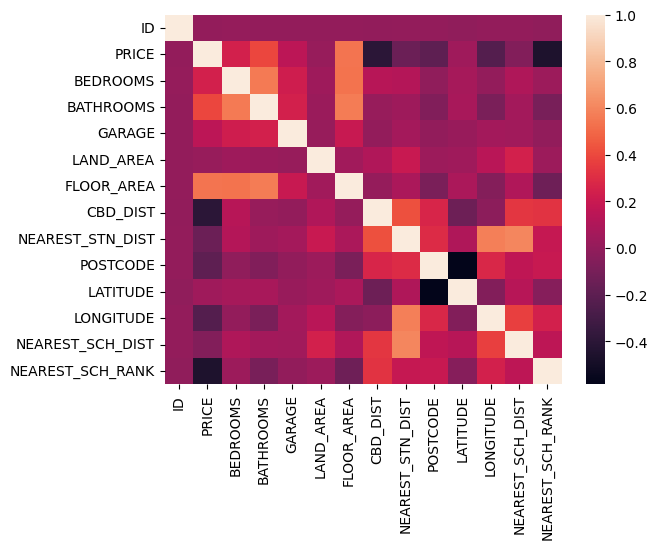

In [60]:
corr = school_nona.corr()
sns.heatmap(corr)

# train 학교 랭킹 예측

In [11]:
X = school_nona.drop("NEAREST_SCH_RANK", axis=1)
y = school_nona.NEAREST_SCH_RANK

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
RFR.score(X_test,y_test)

0.9572584146682297

In [12]:
cross_val_score(RFR, X,y,cv=5)

array([0.96235424, 0.9602879 , 0.96307447, 0.96433154, 0.95648036])

In [13]:
cross_val_score(RFR, X,y,cv=5).mean()

0.9616596590193864

In [63]:
X_pred = school_predict.drop("NEAREST_SCH_RANK", axis=1)

school_predict.drop("NEAREST_SCH_RANK", axis=1)

school_predict["NEAREST_SCH_RANK"] = RFR.predict(X_pred)

c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [64]:
school_predict["NEAREST_SCH_RANK"]

1         72.63
6        137.59
8         77.95
12        83.74
14        99.41
          ...  
18493     87.58
18499    132.16
18500    112.63
18504     75.33
18507     56.40
Name: NEAREST_SCH_RANK, Length: 6000, dtype: float64

# test 학교 랭킹 예측

In [65]:
X = test_school_nona.drop("NEAREST_SCH_RANK", axis=1)
y = test_school_nona.NEAREST_SCH_RANK

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

test_RFR = RandomForestRegressor(random_state=42)
test_RFR.fit(X_train, y_train)
test_RFR.score(X_test,y_test)

# random_state=42 : 0.9478678629261529
# random_state=1 : 0.9641072846178794

0.9641072846178794

In [66]:
cross_val_score(test_RFR, X,y,cv=5)

array([0.95915402, 0.95217549, 0.95475413, 0.95562902, 0.96021686])

In [67]:
X_pred = test_school_predict.drop("NEAREST_SCH_RANK", axis=1)

test_school_predict.drop("NEAREST_SCH_RANK", axis=1)

test_school_predict["NEAREST_SCH_RANK"] = test_RFR.predict(X_pred)

c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [68]:
test_school_predict["NEAREST_SCH_RANK"]

0         81.53
4         55.37
5        103.35
9        133.94
20        94.54
          ...  
15132     78.25
15135    128.96
15141    108.48
15142     85.00
15145    106.27
Name: NEAREST_SCH_RANK, Length: 4952, dtype: float64

In [69]:
df.NEAREST_SCH_RANK.fillna(school_predict["NEAREST_SCH_RANK"], inplace=True)

test_df.NEAREST_SCH_RANK.fillna(test_school_predict["NEAREST_SCH_RANK"], inplace=True)

In [70]:
df.isna().sum()

ID                  0
ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
dtype: int64

In [71]:
test_df.isna().sum()

ID                  0
ADDRESS             0
SUBURB              0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
dtype: int64

In [72]:
date_sold = pd.to_datetime(df.DATE_SOLD)
df["MONTH_SOLD"] = date_sold.apply(lambda x: x.month)
df["YEAR_SOLD"] = date_sold.apply(lambda x: x.year)

test_date_sold = pd.to_datetime(test_df.DATE_SOLD)
test_df["MONTH_SOLD"] = test_date_sold.apply(lambda x: x.month)
test_df["YEAR_SOLD"] = test_date_sold.apply(lambda x: x.year)

In [73]:
data = df.drop(["ADDRESS", "SUBURB", "NEAREST_SCH", "NEAREST_STN", "DATE_SOLD"], axis=1)

test_data = test_df.drop(["ADDRESS", "SUBURB", "NEAREST_SCH", "NEAREST_STN", "DATE_SOLD"], axis=1)

In [74]:
X = data.drop('PRICE', axis=1)
y = data.PRICE

X_train, X_test, y_train, y_test = train_test_split(
  X,
  y, 
  test_size=0.2,
  random_state=2
)

In [75]:
RFR = RandomForestRegressor(random_state=42)

RFR.fit(X_train, y_train)

RFR.score(X_test, y_test)

0.8335733455617768

In [76]:
cross_val_score(RFR, X, y, cv=5)

array([0.80566275, 0.81260294, 0.8400404 , 0.82968098, 0.81684786])

In [77]:
y_pred = RFR.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 91082.08
Mean Squared Error: 22651657325.84
R-squared scores: 0.83


In [79]:
sub_pred = RFR.predict(test_data)

In [80]:
# submit_df = pd.read_csv('./sample_submission.csv')

# submit_df['PRICE'] = sub_pred

# submit_df.to_csv('model12_REG_test3_84.csv', index=False)